In [62]:
'''
'FAVC'      고칼로리 음식자주 섭취   예/아니오 고칼로리 음식을 섭취하는지 여부
'FCVC'      채소 섭취 빈도   예/아니오
'NCP'      주요 식사 횟수
'CAEC'    식사 사이의 음식 섭취
'CH2O'    물섭취량
'''

"\n'FAVC'      고칼로리 음식자주 섭취   예/아니오 고칼로리 음식을 섭취하는지 여부\n'FCVC'      채소 섭취 빈도   예/아니오\n'NCP'      주요 식사 횟수\n'CAEC'    식사 사이의 음식 섭취\n'CH2O'    물섭취량\n"

In [63]:
### 데이터 파일 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

file_name = 'ObesityDataSet_rev.csv'
Obesity_df = pd.read_csv(file_name)
Obesity_df

,FAVC,FCVC,NCP,CAEC,CH2O,NObeyesdad
0,no,2.0,3.0,Sometimes,2.000000,Normal_Weight
1,no,3.0,3.0,Sometimes,3.000000,Normal_Weight
2,no,2.0,3.0,Sometimes,2.000000,Normal_Weight
3,no,3.0,3.0,Sometimes,2.000000,Overweight_Level_I
4,no,2.0,1.0,Sometimes,2.000000,Overweight_Level_II
...,...,...,...,...,...,...
2106,yes,3.0,3.0,Sometimes,1.728139,Obesity_Type_III
2107,yes,3.0,3.0,Sometimes,2.005130,Obesity_Type_III
2108,yes,3.0,3.0,Sometimes,2.054193,Obesity_Type_III
2109,yes,3.0,3.0,Sometimes,2.852339,Obesity_Type_III


## 데이터 전처리

In [64]:
## NObeyesdad 열값 0,1로 바꾸기
num = Obesity_df.shape[0]
Obesity_df['Obesity'] = 0

for i in range(num):
    if Obesity_df.iloc[i]['NObeyesdad'] == 'Normal_Weight':
        Obesity_df.loc[i,'Obesity'] = 'Normal'
    elif Obesity_df.iloc[i]['NObeyesdad'] == 'Insufficient_Weight':
        Obesity_df.loc[i,'Obesity'] = 'Normal'
    elif Obesity_df.iloc[i]['NObeyesdad'] == 'Overweight_Level_I':
        Obesity_df.loc[i,'Obesity'] = 'Normal'
    elif Obesity_df.iloc[i]['NObeyesdad'] == 'Overweight_Level_II':
        Obesity_df.loc[i,'Obesity'] = 'Normal'
    else:
        Obesity_df.loc[i,'Obesity'] = 'Obesity'
Obesity_df


C:\Users\KDP-14\AppData\Local\Temp\ipykernel_16176\714365054.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Normal' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  Obesity_df.loc[i,'Obesity'] = 'Normal'


,FAVC,FCVC,NCP,CAEC,CH2O,NObeyesdad,Obesity
0,no,2.0,3.0,Sometimes,2.000000,Normal_Weight,Normal
1,no,3.0,3.0,Sometimes,3.000000,Normal_Weight,Normal
2,no,2.0,3.0,Sometimes,2.000000,Normal_Weight,Normal
3,no,3.0,3.0,Sometimes,2.000000,Overweight_Level_I,Normal
4,no,2.0,1.0,Sometimes,2.000000,Overweight_Level_II,Normal
...,...,...,...,...,...,...,...
2106,yes,3.0,3.0,Sometimes,1.728139,Obesity_Type_III,Obesity
2107,yes,3.0,3.0,Sometimes,2.005130,Obesity_Type_III,Obesity
2108,yes,3.0,3.0,Sometimes,2.054193,Obesity_Type_III,Obesity
2109,yes,3.0,3.0,Sometimes,2.852339,Obesity_Type_III,Obesity


In [65]:
## 'CAEC','NObeyesdad' drop하기
Obesity_df.drop(['CAEC','NObeyesdad'],axis=1,inplace=True)

# 'FAVC' 열값 0,1로 바꾸기
for i in range(num):
    if Obesity_df.iloc[i]['FAVC'] == 'no':
        Obesity_df.loc[i,'FAVC'] = 0
    elif Obesity_df.iloc[i]['FAVC'] == 'yes':
        Obesity_df.loc[i,'FAVC'] = 1


Obesity_df['FAVC']=Obesity_df['FAVC'].astype(int)
Obesity_df['FCVC']=Obesity_df['FCVC'].astype(int)
Obesity_df['NCP']=Obesity_df['NCP'].astype(int)
Obesity_df['CH2O']=Obesity_df['CH2O'].astype(int)
## 데이터 프레임 정보 확인

Obesity_df.info()
# #   Column   Non-Null Count  Dtype
# ---  ------   --------------  -----
#  0   FAVC     2111 non-null   int32
#  1   FCVC     2111 non-null   int32
#  2   NCP      2111 non-null   int32
#  3   CH2O     2111 non-null   int32
#  4   Obesity  2111 non-null   int64 

# Obesity_df.set_index('Obesity',inplace=True)
# Obesity_df.sort_index(inplace=True)
Obesity_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   FAVC     2111 non-null   int32 
 1   FCVC     2111 non-null   int32 
 2   NCP      2111 non-null   int32 
 3   CH2O     2111 non-null   int32 
 4   Obesity  2111 non-null   object
dtypes: int32(4), object(1)
memory usage: 49.6+ KB


,FAVC,FCVC,NCP,CH2O,Obesity
0,0,2,3,2,Normal
1,0,3,3,3,Normal
2,0,2,3,2,Normal
3,0,3,3,2,Normal
4,0,2,1,2,Normal
...,...,...,...,...,...
2106,1,3,3,1,Obesity
2107,1,3,3,2,Obesity
2108,1,3,3,2,Obesity
2109,1,3,3,2,Obesity


In [66]:
# FAVC ( 고칼로리 음식자주 섭취 ) 과 비만 여부 
Ob_FAVC = Obesity_df.groupby(['FAVC', 'Obesity'])
Ob_FAVC

In [67]:
Ob_FAVC_count=Ob_FAVC.count()
Ob_FAVC_count

FCVC  NCP  CH2O
FAVC Obesity                 
0    Normal    226  226   226
     Obesity    19   19    19
1    Normal    913  913   913
     Obesity   953  953   953

In [68]:
Ob_FAVC_count.reset_index(inplace = True)
Ob_FAVC_count

,FAVC,Obesity,FCVC,NCP,CH2O
0,0,Normal,226,226,226
1,0,Obesity,19,19,19
2,1,Normal,913,913,913
3,1,Obesity,953,953,953


In [69]:
Ob_FAVC_count['name'] = ['고칼로리 음식 자주 섭취 X,Noraml',
                         '고칼로리 음식 자주 섭취 X,Obesity',
                         '고칼로리 음식 자주 섭취 O,Noraml',
                         '고칼로리 음식 자주 섭취 O,Obesity']

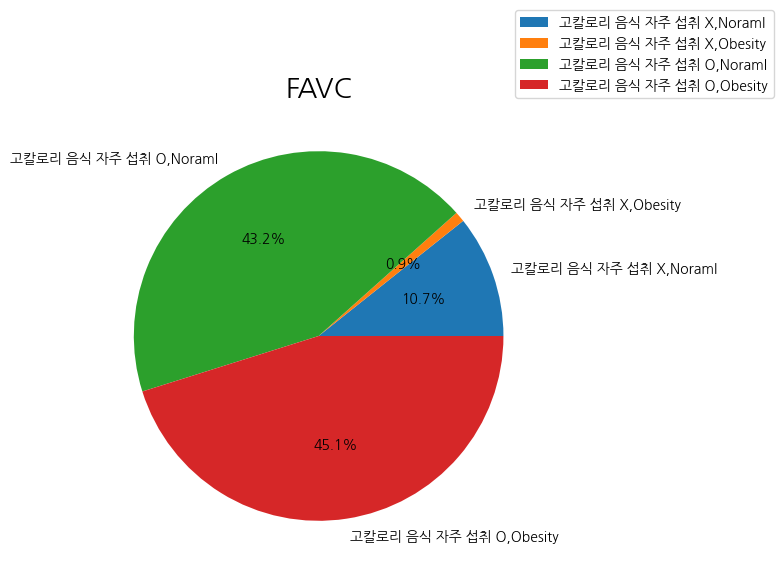

In [70]:
## FAVC pie chart
plt.figure(figsize=(10,6))
plt.pie(Ob_FAVC_count['FCVC'], labels =Ob_FAVC_count['name'],autopct='%.1f%%')
plt.legend(loc='lower right', bbox_to_anchor=(1.5, 1))
plt.title('FAVC',fontsize=20)
plt.show()

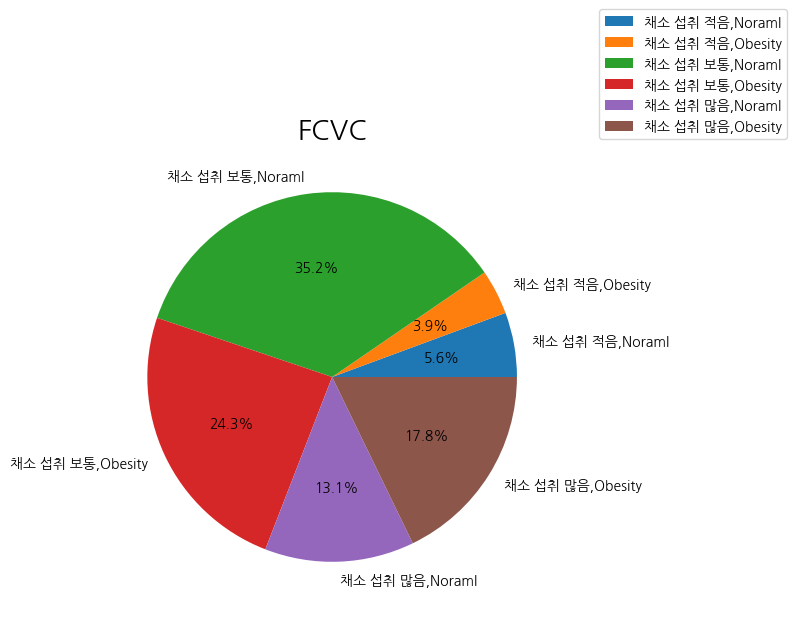

In [71]:
# FCVC ( 채소 섭취 빈도 ) 과 비만 여부 
Ob_FCVC  = Obesity_df.groupby(['FCVC', 'Obesity'])
Ob_FCVC_count=Ob_FCVC.count()
Ob_FCVC_count.reset_index(inplace = True)
Ob_FCVC_count['name'] = ['채소 섭취 적음,Noraml',
                         '채소 섭취 적음,Obesity',
                         '채소 섭취 보통,Noraml',
                         '채소 섭취 보통,Obesity',
                         '채소 섭취 많음,Noraml',
                         '채소 섭취 많음,Obesity']
## FAVC pie chart
plt.figure(figsize=(10,6))
plt.pie(Ob_FCVC_count['FAVC'], labels =Ob_FCVC_count['name'],autopct='%.1f%%')
plt.legend(loc='lower right', bbox_to_anchor=(1.5, 1))
plt.title('FCVC',fontsize=20)
plt.show()



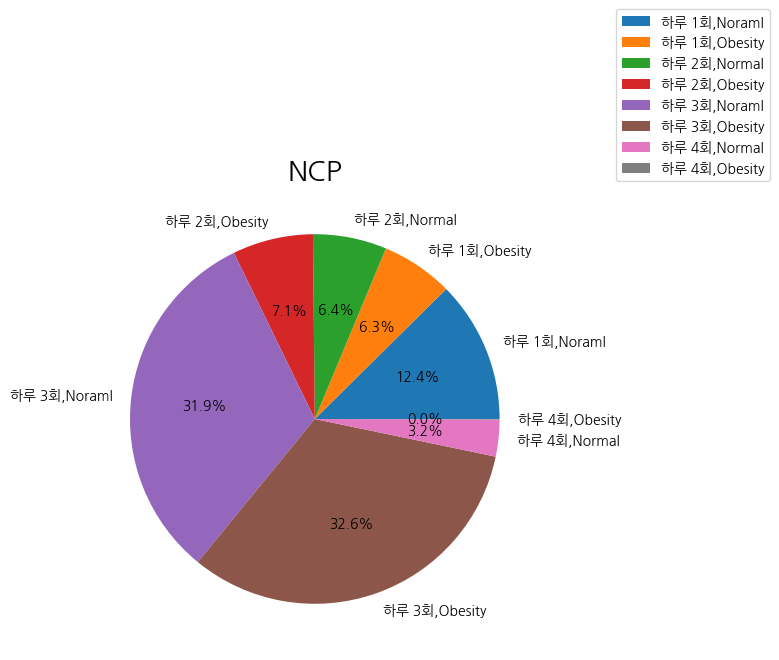

In [72]:
# NCP ( 하루 식사 횟수 ) 과 비만 여부 
Ob_NCP  = Obesity_df.groupby(['NCP', 'Obesity'])
Ob_NCP_count=Ob_NCP.count()
Ob_NCP_count.reset_index(inplace = True)
Ob_NCP_count
Ob_NCP_count['name'] = ['하루 1회,Noraml',
                         '하루 1회,Obesity',
                         '하루 2회,Normal',
                            '하루 2회,Obesity',
                         '하루 3회,Noraml',
                         '하루 3회,Obesity',
                         '하루 4회,Normal',
                            '하루 4회,Obesity']
# NCP pie chart
plt.figure(figsize=(10,6))
plt.pie(Ob_NCP_count['FAVC'], labels =Ob_NCP_count['name'],autopct='%.1f%%')
plt.legend(loc='lower right', bbox_to_anchor=(1.5, 1))
plt.title('NCP',fontsize=20)
plt.show()  

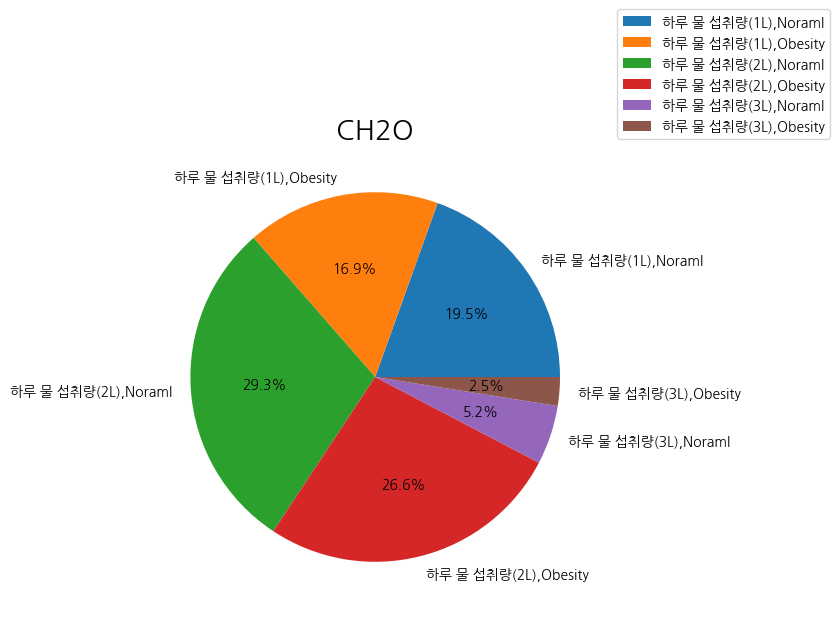

In [73]:
# CH2O ( 물 섭취량 ) 과 비만 여부 
Ob_CH2O  = Obesity_df.groupby(['CH2O', 'Obesity'])
Ob_CH2O_count=Ob_CH2O.count()
Ob_CH2O_count.reset_index(inplace = True)
Ob_CH2O_count
Ob_CH2O_count['name'] = ['하루 물 섭취량(1L),Noraml',
                         '하루 물 섭취량(1L),Obesity',
                         '하루 물 섭취량(2L),Noraml',
                         '하루 물 섭취량(2L),Obesity',
                         '하루 물 섭취량(3L),Noraml',
                         '하루 물 섭취량(3L),Obesity']
## CH2O pie chart
plt.figure(figsize=(10,6))
plt.pie(Ob_CH2O_count['FAVC'], labels =Ob_CH2O_count['name'],autopct='%.1f%%')
plt.legend(loc='lower right', bbox_to_anchor=(1.5, 1))
plt.title('CH2O',fontsize=20)
plt.show()

In [74]:
# 왜 무슨 수치든 상관없이 비만도가 높게 나올까??
# => 비만인 사람들을 너무 많이 묶어버렸다??
Obesity_df['Obesity'].value_counts()

Obesity
Normal     1139
Obesity     972
Name: count, dtype: int64

In [75]:
file_name = 'ObesityDataSet_rev.csv'
Obesity_df2 = pd.read_csv(file_name)
Obesity_df2

,FAVC,FCVC,NCP,CAEC,CH2O,NObeyesdad
0,no,2.0,3.0,Sometimes,2.000000,Normal_Weight
1,no,3.0,3.0,Sometimes,3.000000,Normal_Weight
2,no,2.0,3.0,Sometimes,2.000000,Normal_Weight
3,no,3.0,3.0,Sometimes,2.000000,Overweight_Level_I
4,no,2.0,1.0,Sometimes,2.000000,Overweight_Level_II
...,...,...,...,...,...,...
2106,yes,3.0,3.0,Sometimes,1.728139,Obesity_Type_III
2107,yes,3.0,3.0,Sometimes,2.005130,Obesity_Type_III
2108,yes,3.0,3.0,Sometimes,2.054193,Obesity_Type_III
2109,yes,3.0,3.0,Sometimes,2.852339,Obesity_Type_III


In [77]:
Obesity_df2['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64